# Naive Bayes News Classification
This project involves building a text classification model using the Naive Bayes algorithm to categorize news articles into one of 20 different topics. The process includes loading the 20 Newsgroups dataset, preprocessing the text data, training the Naive Bayes model, and evaluating its performance using various metrics. The goal is to accurately classify news articles based on their content using a simple yet effective machine learning approach.

## 1. Environment Setup
Install and import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading and Exploring the Data

In [3]:
# Load the 20 Newsgroups dataset (Train and Test sets)
newsgroups_train = fetch_20newsgroups(subset="train", shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset="test", shuffle=True, random_state=42)

print(f"Number of training samples: {len(newsgroups_train.data)}")  # list of strings
print(f"Number of test samples: {len(newsgroups_test.data)}")
print(f"Target names (categories): {newsgroups_train.target_names}")

Number of training samples: 11314
Number of test samples: 7532
Target names (categories): ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
print("\nSample document:\n")
print(newsgroups_train.data[10])


Sample document:

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
------------------------------------------------

## 3. Text Preprocessing

In [7]:
# Bag-of-Words (Count Vectorizer)
# 영어에서 기본적으로 제공하는 불용어를 제거하고, 최대 1000개의 가장 자주 등장하는 단어만 사용(계산복잡성을 줄이기 위함)
count_vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X_train_counts = count_vectorizer.fit_transform(newsgroups_train.data)
X_test_counts = count_vectorizer.transform(newsgroups_test.data)

### BoW (Bag of Words)

In [24]:
# 단어 사전(피처 네임) 출력
feature_names = count_vectorizer.get_feature_names_out()
print(f"Number of features: {len(feature_names)}")
print(f"Last 10 features: {feature_names[-10:]}")

Number of features: 1000
Last 10 features: ['write' 'writes' 'written' 'wrong' 'wrote' 'year' 'years' 'yes' 'york'
 'young']


In [15]:
# 첫 번째 문서의 벡터 확인
first_document_vector = X_train_counts[0].toarray()
print(f"First document vector shape: {first_document_vector.shape}")
print(f"First document vector: {first_document_vector}")

First document vector shape: (1, 1000)
First document vector: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test_tfidf = tfidf_vectorizer.transform(newsgroups_test.data)

In [27]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"First 10 features: {feature_names[:10]}")

First 10 features: ['00' '000' '01' '02' '03' '04' '0d' '0t' '10' '100']


In [28]:
first_document_tfidf = X_train_tfidf[0].toarray()
print(f"First document TF-IDF vector: {first_document_tfidf}")

First document TF-IDF vector: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12190754 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.      

In [35]:
list(zip(feature_names, first_document_tfidf))

[('00', 0.0),
 ('000', 0.0),
 ('01', 0.0),
 ('02', 0.0),
 ('03', 0.0),
 ('04', 0.0),
 ('0d', 0.0),
 ('0t', 0.0),
 ('10', 0.0),
 ('100', 0.0),
 ('11', 0.0),
 ('12', 0.0),
 ('13', 0.0),
 ('14', 0.0),
 ('145', 0.0),
 ('15', 0.12190754253603438),
 ('16', 0.0),
 ('17', 0.0),
 ('18', 0.0),
 ('19', 0.0),
 ('1992', 0.0),
 ('1993', 0.0),
 ('1993apr15', 0.0),
 ('1d9', 0.0),
 ('1t', 0.0),
 ('20', 0.0),
 ('200', 0.0),
 ('21', 0.0),
 ('22', 0.0),
 ('23', 0.0),
 ('24', 0.0),
 ('25', 0.0),
 ('26', 0.0),
 ('27', 0.0),
 ('28', 0.0),
 ('29', 0.0),
 ('2di', 0.0),
 ('2tm', 0.0),
 ('30', 0.0),
 ('31', 0.0),
 ('32', 0.0),
 ('33', 0.0),
 ('34', 0.0),
 ('34u', 0.0),
 ('35', 0.0),
 ('36', 0.0),
 ('37', 0.0),
 ('38', 0.0),
 ('39', 0.0),
 ('3d', 0.0),
 ('3t', 0.0),
 ('40', 0.0),
 ('408', 0.0),
 ('41', 0.0),
 ('42', 0.0),
 ('43', 0.0),
 ('44', 0.0),
 ('45', 0.0),
 ('46', 0.0),
 ('48', 0.0),
 ('49', 0.0),
 ('50', 0.0),
 ('500', 0.0),
 ('51', 0.0),
 ('55', 0.0),
 ('60', 0.0),
 ('70', 0.0),
 ('75', 0.0),
 ('75u', 0.

In [29]:
word_tfidf_pairs = list(zip(feature_names, first_document_tfidf))
word_tfidf_pairs = [
    pair for pair in word_tfidf_pairs if pair[1] > 0
]  # TF-IDF 값이 0인 단어 제외
print(f"Non-zero TF-IDF values in the first document: {word_tfidf_pairs}")

Non-zero TF-IDF values in the first document: [('15', 0.12190754253603438), ('body', 0.1677978607583072), ('called', 0.13299937876994666), ('car', 0.734107012796899), ('college', 0.15018239454759513), ('day', 0.12747265599676127), ('early', 0.16271777352755867), ('edu', 0.10513674177848499), ('engine', 0.1870163653627231), ('history', 0.16060438353726775), ('host', 0.06818802920052382), ('info', 0.14078947345935744), ('know', 0.08240921121852324), ('lines', 0.036998958519124395), ('looked', 0.17395850960321824), ('looking', 0.13299937876994666), ('mail', 0.11530939544705354), ('model', 0.1702612295799925), ('nntp', 0.06867110600648463), ('organization', 0.03836460263566478), ('posting', 0.06636009063822013), ('really', 0.10908571416404726), ('rest', 0.1573023187576859), ('saw', 0.16291604373347904), ('small', 0.1448816454476136), ('subject', 0.036878169470281864), ('thanks', 0.10609305289076199), ('thing', 0.11962569091167664), ('university', 0.07139338699565294), ('years', 0.116702241

## 4. Model Training

In [36]:
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, newsgroups_train.target)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

In [37]:
y_pred

array([10,  8,  0, ..., 10,  3, 15])

## 5. Model Evaluation

In [38]:
# Evaluate accuracy
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6733


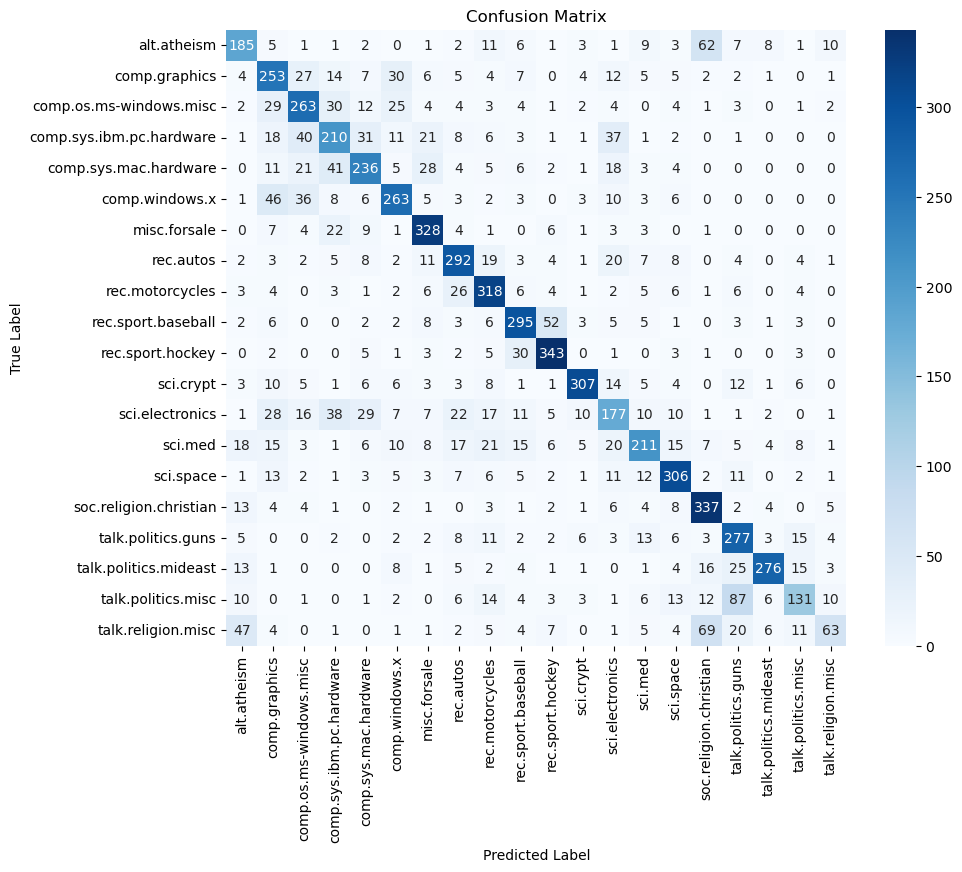

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(newsgroups_test.target, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=newsgroups_train.target_names,
    yticklabels=newsgroups_train.target_names,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
# Classification Report
class_report = classification_report(
    newsgroups_test.target, y_pred, target_names=newsgroups_train.target_names
)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.59      0.58      0.59       319
           comp.graphics       0.55      0.65      0.60       389
 comp.os.ms-windows.misc       0.62      0.67      0.64       394
comp.sys.ibm.pc.hardware       0.55      0.54      0.54       392
   comp.sys.mac.hardware       0.65      0.61      0.63       385
          comp.windows.x       0.68      0.67      0.67       395
            misc.forsale       0.73      0.84      0.78       390
               rec.autos       0.69      0.74      0.71       396
         rec.motorcycles       0.68      0.80      0.74       398
      rec.sport.baseball       0.72      0.74      0.73       397
        rec.sport.hockey       0.77      0.86      0.81       399
               sci.crypt       0.87      0.78      0.82       396
         sci.electronics       0.51      0.45      0.48       393
                 sci.med       0.69      0.53     

- Overall Accuracy: The model achieved an accuracy of 67%, indicating a moderate performance in classifying the 20 different news groups.
- Strong Performance:
	- rec.sport.hockey: High precision (0.77) and recall (0.86), with 343 correctly classified out of 399 samples.
	- soc.religion.christian: High recall (0.85) with 337 correctly classified out of 398 samples.

- Notable Confusions:
	 - talk.religion.misc: Significant confusion with alt.atheism (62 misclassifications) and soc.religion.christian (69 misclassifications), resulting in a low F1-score (0.36).
	 - sci.electronics: Confused with comp.sys.ibm.pc.hardware and comp.sys.mac.hardware, leading to a moderate F1-score (0.48).
- Classes with Lower Performance: talk.politics.misc and talk.religion.misc have lower precision and recall, indicating difficulties in correctly classifying these categories.

- Model Improvement Suggestions:
	- Address class imbalances and refine feature extraction, particularly for classes with high confusion rates.
	- Consider additional data preprocessing or advanced classification algorithms to reduce misclassification.